In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## SVM

https://www.geeksforgeeks.org/support-vector-machine-algorithm/ 

https://www.kaggle.com/code/kazimjawad/svm-using-blobs

Support Vector Machine (SVM) is a supervised learning algorithm used for classification (and sometimes regression).
It tries to find the best hyperplane (in 2D it’s a line) that separates classes with the largest possible margin.

**Hard Margin SVM**:
- Assumes data is perfectly separable.
- The model tries to find a hyperplane where **no points cross the margin**.

**Soft Margin SVM**:
- Allows some points to violate the margin (or even be on the wrong side).
- Uses a parameter **C** to control the trade-off between **maximizing margin** and **minimizing classification error**.

**Kernels**:
- Used when data is **not linearly separable**.
- Kernel functions **map data to higher dimensions** to make it separable.  
    E.g., **RBF (Radial Basis Function)** kernel or **polynomial kernel**.

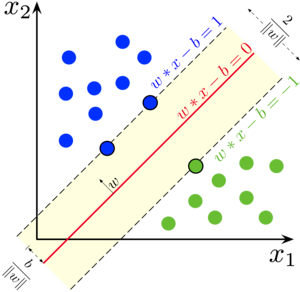

In [2]:
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

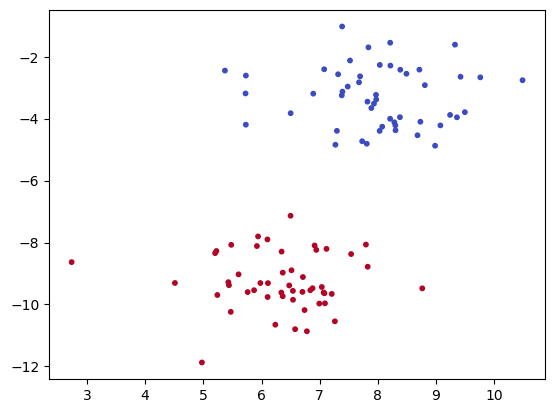

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)

In [10]:
# Hard Margin SVM (C very large)
clf_hard = svm.SVC(kernel='linear', C=1e10)
clf_hard.fit(X, y)

# Soft Margin SVM (C small)
clf_soft = svm.SVC(kernel='linear', C=0.01)
clf_soft.fit(X, y)


SVC(C=0.01, kernel='linear')

In [11]:
# Plot function
def plot_svm(clf, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot margin, decision boundary, and support vectors
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


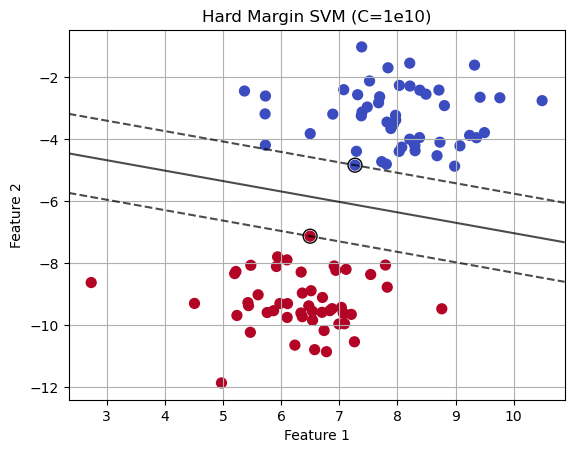

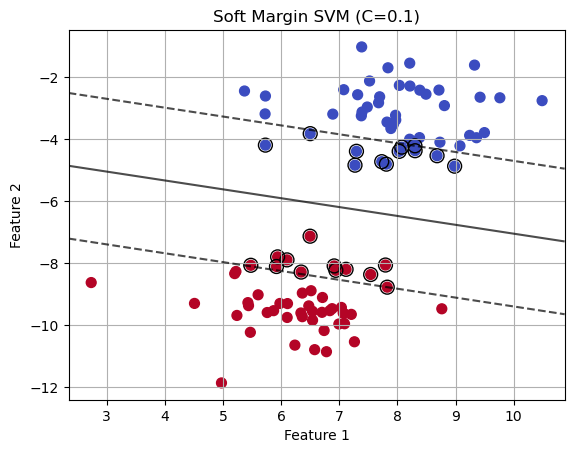

In [12]:
# Plot Hard Margin
plot_svm(clf_hard, "Hard Margin SVM (C=1e10)")

# Plot Soft Margin
plot_svm(clf_soft, "Soft Margin SVM (C=0.1)")


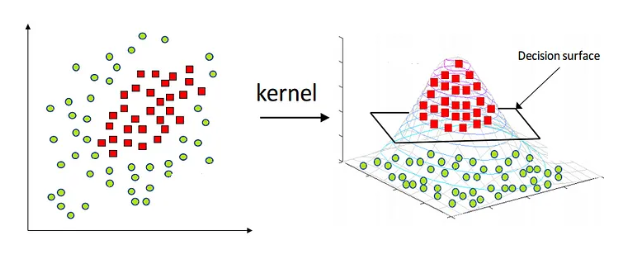

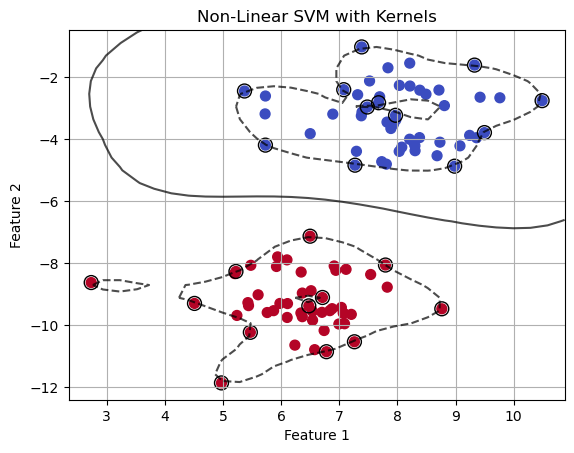

In [29]:
# 3️⃣ Kernelized SVM (RBF Kernel)
clf_rbf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf_rbf.fit(X, y)

plot_svm(clf_rbf, "Non-Linear SVM with Kernels")

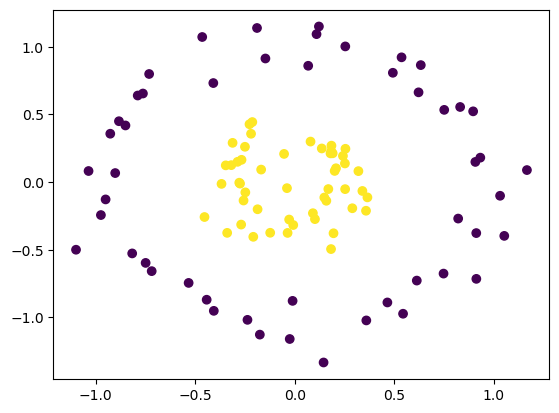

In [30]:
from sklearn.datasets import make_circles
X, Y = make_circles(noise=0.1, factor=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=Y)

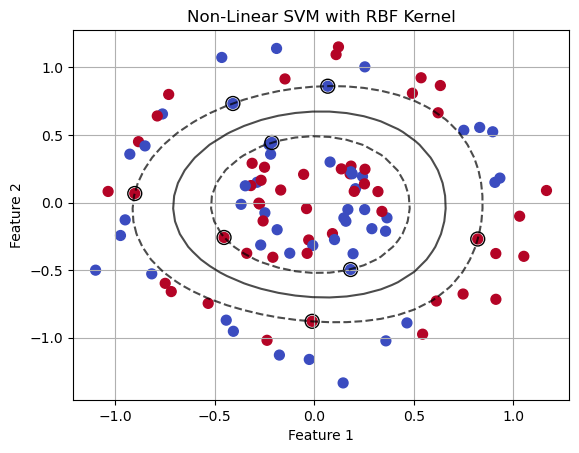

In [34]:
clf_rbf = svm.SVC(kernel='rbf', C=1000, gamma=1)
clf_rbf.fit(X, Y)

plot_svm(clf_rbf, "Non-Linear SVM with RBF Kernel")

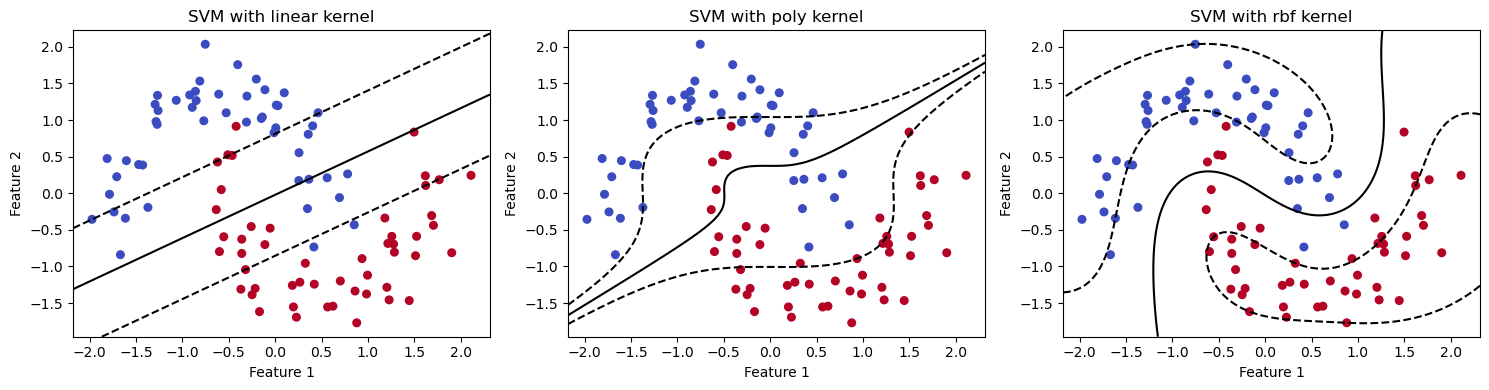

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Create a simple non-linear dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X = StandardScaler().fit_transform(X)  # Normalize for better SVM performance

# Define kernels to compare
kernels = ['linear', 'poly', 'rbf']

# Plotting
plt.figure(figsize=(15, 4))

for i, kernel in enumerate(kernels):
    # Create SVM classifier with the specified kernel
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=3, C=1)
    else:
        clf = svm.SVC(kernel=kernel, C=1)
        
    clf.fit(X, y)
    
    # Plot decision boundary
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot margins and decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
               linestyles=['--', '-', '--'])
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()



## ROC, AUC curves 

https://www.datacamp.com/tutorial/auc

In [ ]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape


In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]


In [ ]:
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

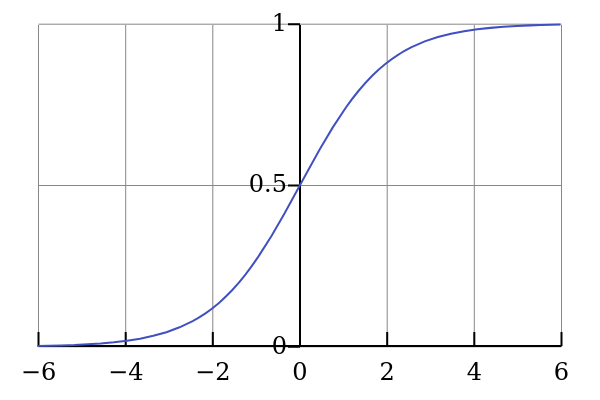

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC - ROC score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')